In [ ]:
import pandas as pd

In [4]:
data = {
 'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain',
'Overcast', 'Sunny',
 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast',
'Rain'],
 'Temperature':['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
'Mild',
 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
 'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal',
'Normal', 'High',
 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
 'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong',
'Strong', 'Weak',
 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
 'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
                'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

In [5]:
df = pd.DataFrame(data)

In [6]:
df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [10]:
df_encoded = df.copy()
label_encoders = {}

for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [11]:
# Features and Target
X = df_encoded.drop('PlayTennis', axis=1)
y = df_encoded['PlayTennis']

In [12]:
# Train decision tree (ID3 → use criterion='entropy')
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

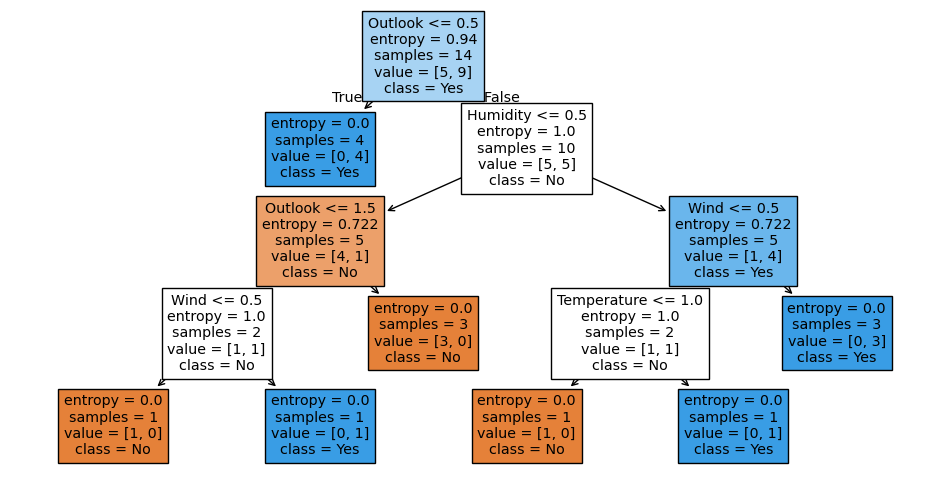

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plot_tree(model,
 feature_names=X.columns,
 class_names=label_encoders['PlayTennis'].classes_,
 filled=True)
plt.show()